# Importing modules

In [2]:
from ucimlrepo import fetch_ucirepo

import numpy as np
import pandas as pd
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt

pd.options.mode.chained_assignment = None
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neural_network import MLPRegressor

# Get dataset from UCI repository

In [3]:
# fetch dataset 
dow_jones_index = fetch_ucirepo(id=312)
#Brown,Michael. (2014). Dow Jones Index. UCI Machine Learning Repository. https://doi.org/10.24432/C5788V.
  
# data (as pandas dataframes) 
df = dow_jones_index.data.features

In [4]:
df

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,days_to_next_dividend,percent_return_next_dividend
0,1,AA,1/7/2011,$15.82,$16.72,$15.78,$16.42,239655616,3.79267,NaN,NaN,$16.71,$15.97,26,0.182704
1,1,AA,1/14/2011,$16.71,$16.71,$15.64,$15.97,242963398,-4.42849,1.380223,239655616.0,$16.19,$15.79,19,0.187852
2,1,AA,1/21/2011,$16.19,$16.38,$15.60,$15.79,138428495,-2.47066,-43.024959,242963398.0,$15.87,$16.13,12,0.189994
3,1,AA,1/28/2011,$15.87,$16.63,$15.82,$16.13,151379173,1.63831,9.355500,138428495.0,$16.18,$17.14,5,0.185989
4,1,AA,2/4/2011,$16.18,$17.39,$16.18,$17.14,154387761,5.93325,1.987452,151379173.0,$17.33,$17.37,97,0.175029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,2,XOM,5/27/2011,$80.22,$82.63,$80.07,$82.63,68230855,3.00424,-21.355713,86758820.0,$83.28,$81.18,75,0.568801
746,2,XOM,6/3/2011,$83.28,$83.75,$80.18,$81.18,78616295,-2.52161,15.221032,68230855.0,$80.93,$79.78,68,0.578960
747,2,XOM,6/10/2011,$80.93,$81.87,$79.72,$79.78,92380844,-1.42098,17.508519,78616295.0,$80.00,$79.02,61,0.589120
748,2,XOM,6/17/2011,$80.00,$80.82,$78.33,$79.02,100521400,-1.22500,8.811952,92380844.0,$78.65,$76.78,54,0.594786


## Extract the attributes that we consider most important

In [5]:
attributes_of_interest = ['quarter', 'stock', 'open', 'high', 'low', 'close', 'volume', 'percent_return_next_dividend']
df_filter = df[attributes_of_interest]
df_filter.head()

,quarter,stock,open,high,low,close,volume,percent_return_next_dividend
0,1,AA,$15.82,$16.72,$15.78,$16.42,239655616,0.182704
1,1,AA,$16.71,$16.71,$15.64,$15.97,242963398,0.187852
2,1,AA,$16.19,$16.38,$15.60,$15.79,138428495,0.189994
3,1,AA,$15.87,$16.63,$15.82,$16.13,151379173,0.185989
4,1,AA,$16.18,$17.39,$16.18,$17.14,154387761,0.175029


In [6]:
df_filter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   quarter                       750 non-null    int64  
 1   stock                         750 non-null    object 
 2   open                          750 non-null    object 
 3   high                          750 non-null    object 
 4   low                           750 non-null    object 
 5   close                         750 non-null    object 
 6   volume                        750 non-null    int64  
 7   percent_return_next_dividend  750 non-null    float64
dtypes: float64(1), int64(2), object(5)
memory usage: 47.0+ KB


## Clean dataset
* remove specific characters
* transform categoric attribute with Label Encoder 

In [7]:
for attribute in ['open', 'high', 'low', 'close']:
  df_filter[attribute] = df_filter[attribute].str.replace('$', '', regex=False).astype(float)

In [8]:
le = LabelEncoder()

stocks = df_filter['stock'].unique()
le.fit(stocks)
df_filter['stock'] = le.transform(df_filter['stock'])

In [9]:
df_filter.head()

,quarter,stock,open,high,low,close,volume,percent_return_next_dividend
0,1,0,15.82,16.72,15.78,16.42,239655616,0.182704
1,1,0,16.71,16.71,15.64,15.97,242963398,0.187852
2,1,0,16.19,16.38,15.60,15.79,138428495,0.189994
3,1,0,15.87,16.63,15.82,16.13,151379173,0.185989
4,1,0,16.18,17.39,16.18,17.14,154387761,0.175029


In [10]:
df_filter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   quarter                       750 non-null    int64  
 1   stock                         750 non-null    int32  
 2   open                          750 non-null    float64
 3   high                          750 non-null    float64
 4   low                           750 non-null    float64
 5   close                         750 non-null    float64
 6   volume                        750 non-null    int64  
 7   percent_return_next_dividend  750 non-null    float64
dtypes: float64(5), int32(1), int64(2)
memory usage: 44.1 KB


# Split data into train and test splits
* first quartile of the year will be for training
* second quartile will be for testing

In [11]:
df_train = df_filter[df_filter['quarter'] == 1]
df_test = df_filter[df_filter['quarter'] == 2]

# Split data into features and targets

In [12]:
labels_train = df_train['percent_return_next_dividend'].copy()
df_train.drop(columns=['percent_return_next_dividend'], inplace = True)

labels_test = df_test['percent_return_next_dividend'].copy()
df_test.drop(columns=['percent_return_next_dividend'], inplace = True)

print(df_train.shape, labels_train.shape)
print(df_test.shape, labels_test.shape)

(360, 7) (360,)
(390, 7) (390,)


# Standardize data wirh StandardScaler

In [13]:
scaler = StandardScaler()
x_train = scaler.fit_transform(df_train)
x_test = scaler.fit_transform(df_test)

# Implementing metrics


## Mean Squared Error
$$MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$$

In [14]:
# Mean Squared Error
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

## Mean Absolute Error
$$MAE = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|$$

In [15]:
# Mean Absolute Error
def mean_absolute_error(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

## Relative Absolute Error
$$RSE = \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}$$

In [16]:
# Relative Absolute Error
def relative_absolute_error(y_true, y_pred):
    numerator = np.sum(np.abs(y_true - y_pred))
    denominator = np.sum(np.abs(y_true - np.mean(y_true)))
    return numerator / denominator

## Residual Standard Error
$$RAE = \frac{\sum_{i=1}^{n} |y_i - \hat{y}_i|}{\sum_{i=1}^{n} |y_i - \bar{y}|}$$

In [17]:
# Residual Standard Error
def residual_standard_error(y_true, y_pred):
    residual_sum_of_squares = np.sum((y_true - y_pred) ** 2)
    degrees_of_freedom = len(y_true) - 2
    return np.sqrt(residual_sum_of_squares / degrees_of_freedom)

## Mean absolute percentage error
$$MAPE = \frac{1}{n} \sum_{i=1}^{n} \left|\frac{y_i - \hat{y}_i}{y_i}\right| \times 100\%$$

In [18]:
# Mean absolute percentage error
def mean_absolute_percentage_error(y, y_hat):
    mape = np.mean(np.abs((y - y_hat) / y)) * 100
    return mape

## correlation coefficient
$$R = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum_{i=1}^{n} (x_i - \bar{x})^2 \sum_{i=1}^{n} (y_i - \bar{y})^2}}$$

In [19]:
# correlation coefficient
def correlation_coefficient(y, y_hat):
    y_mean = np.mean(y)
    y_hat_mean = np.mean(y_hat)
    numerator = np.sum((y - y_mean) * (y_hat - y_hat_mean))
    denominator = np.sqrt(np.sum((y - y_mean) ** 2) * np.sum((y_hat - y_hat_mean) ** 2))
    r = numerator / denominator
    return r

## R-squared
$$R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}$$

In [20]:
# R-squared
def r_squared(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - (ss_res / ss_tot)

# Define the regressor models
(The main goal of this project is to implement metrics from scratch, that's why I don't dive into hyperparameters of the models)

In [21]:
regressors = [LinearRegression(),
              DecisionTreeRegressor(),
              RandomForestRegressor(),
              GradientBoostingRegressor(),
              ExtraTreesRegressor(),
              MLPRegressor(hidden_layer_sizes=(1000,))]

regressors_names = ['LinearReg',
                    'DecisionTreeReg',
                    'RandomForestReg',
                    'GradientBoostingReg',
                    'ExtraTreesReg',
                    'MLPReg']

In [22]:
# Arrays where the metrics per model will be saved
MSE, MAE, RSE, MAPE, RAE, R, R2 = [], [], [], [], [], [], []
# Dictionary where the key will be the regressor model name and the value will be the predicted labels
labels_per_regressor = {}

# Loop that iterates over each regressor model
for regressor, regressor_name in tqdm(zip(regressors, regressors_names), desc = ''):
  #train the regresor model
  regressor.fit(x_train, labels_train)
  #make predictions
  labels_pred = regressor.predict(x_test)
  #store those predictions on the dictionary using the current regressor model name as the key
  labels_per_regressor[regressor_name] = labels_pred

  #calculate and store metrics for actual labels values vs the predicted ones, also round the value to avoid several decimals
  MSE.append(np.round(mean_squared_error(labels_test, labels_pred), 4))
  MAE.append(np.round(mean_absolute_error(labels_test, labels_pred), 4))
  RSE.append(np.round(residual_standard_error(labels_test, labels_pred), 4))
  MAPE.append(np.round(mean_absolute_percentage_error(labels_test, labels_pred), 4))
  RAE.append(np.round(relative_absolute_error(labels_test, labels_pred), 4))
  R.append(np.round(correlation_coefficient(labels_test, labels_pred), 4))
  R2.append(np.round(r_squared(labels_test, labels_pred), 4))

6it [00:01,  3.28it/s]


# Create a table with the metrics calculated for each regressor model

In [25]:
# Define a dataframe and its content
df_metrics = pd.DataFrame({'Regressor': regressors_names,
                           'MSE': MSE,
                           'MAE': MAE,
                           'RSE': RSE,
                           'RAE': RAE,
                           'MAPE' : MAPE,
                           'R' : R,
                           'R2': R2,})
# Sort dataframe by the column MSE
df_metrics.sort_values(by=['MSE'], ascending=True, inplace = True)
df_metrics.reset_index(inplace=True, drop=True)
df_metrics

,Regressor,MSE,MAE,RSE,RAE,MAPE,R,R2
0,ExtraTreesReg,0.0025,0.0313,0.0498,0.1429,5.6381,0.9859,0.9710
1,GradientBoostingReg,0.0036,0.0435,0.0605,0.1984,7.5224,0.9791,0.9570
2,RandomForestReg,0.0072,0.0507,0.0853,0.2312,9.7885,0.9567,0.9147
3,DecisionTreeReg,0.0089,0.0503,0.0943,0.2295,9.2810,0.9508,0.8957
4,MLPReg,0.0199,0.1105,0.1414,0.5040,19.9837,0.8762,0.7655
5,LinearReg,0.0497,0.1841,0.2235,0.8395,38.4831,0.6453,0.4145


# Predicted vs actual plot
Ideally, if the predictions are perfect, the points will lie along a straight line with a slope of 1.

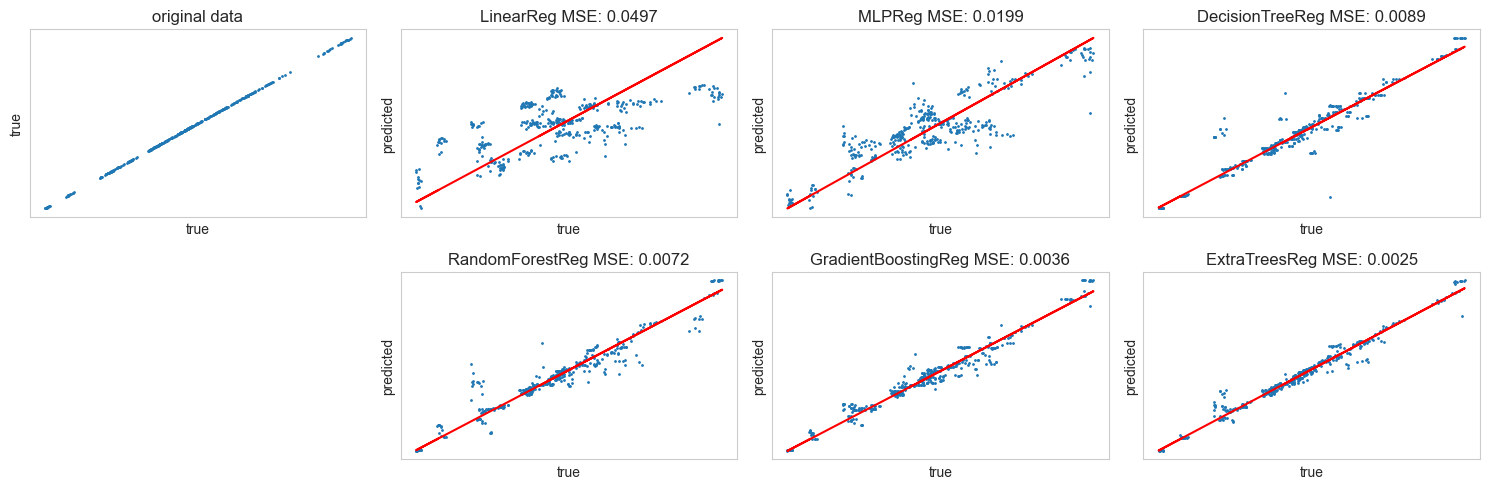

In [26]:
# Create a grid of pie charts
fig, axs = plt.subplots(2, 4, figsize=(15, 5))

# Flatten the axis array for easy iteration
axs = axs.ravel('A')

axs[0].scatter(labels_test, labels_test, s=1)
axs[0].set_title('original data')
axs[0].set_xlabel('true')
axs[0].set_ylabel('true')
axs[0].set_xticks([])
axs[0].set_yticks([])

#fig.delaxes(axs[1])

for i, regressors_name in enumerate(df_metrics['Regressor'][::-1]):
  #axs[i].axis('equal')
  if i<3:
    axs[i+1].plot(labels_test, labels_test, 'r')
    axs[i+1].scatter(labels_test, labels_per_regressor[regressors_name], s=1)

    mse_value_per_regressor = round(df_metrics.loc[df_metrics['Regressor'] == regressors_name, 'MSE'].item(), 4)
    axs[i+1].set_title(regressors_name + ' MSE: ' + str(mse_value_per_regressor))
    axs[i+1].set_xlabel('true')
    axs[i+1].set_ylabel('predicted')
    axs[i+1].set_xticks([])
    axs[i+1].set_yticks([])
  else:
    axs[i+2].plot(labels_test, labels_test, 'r')
    axs[i+2].scatter(labels_test, labels_per_regressor[regressors_name], s=1)

    mse_value_per_regressor = df_metrics.loc[df_metrics['Regressor'] == regressors_name, 'MSE'].item()
    axs[i+2].set_title(regressors_name + ' MSE: ' + str(mse_value_per_regressor))
    axs[i+2].set_xlabel('true')
    axs[i+2].set_ylabel('predicted')
    axs[i+2].set_xticks([])
    axs[i+2].set_yticks([])

fig.delaxes(axs[4])

plt.tight_layout()

# Chart bar for MSE, MAE, RSE and RAE

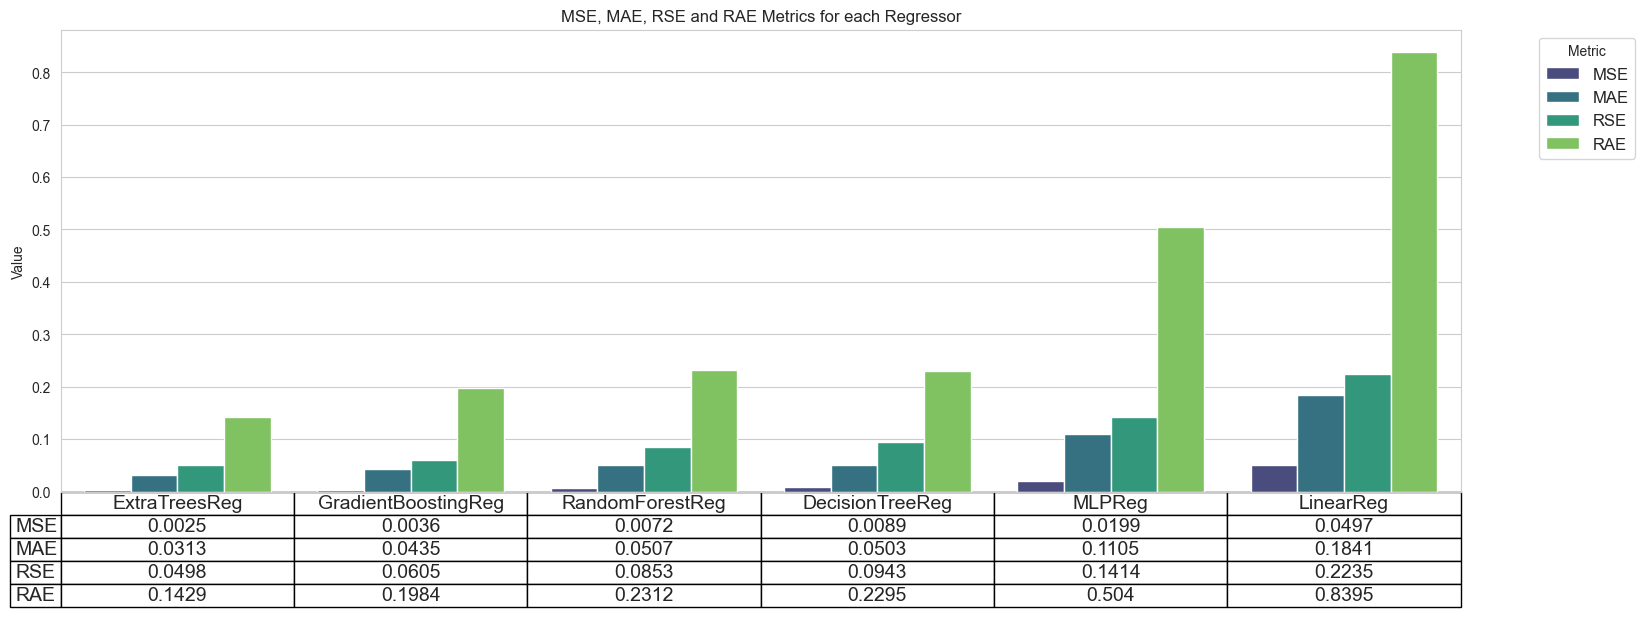

In [27]:
df = df_metrics.copy()
df.drop(columns=['MAPE','R','R2'], inplace=True)

# Reshape the dataframe to a long format for plotting
df_long = df.melt(id_vars='Regressor', var_name='Metric', value_name='Value')

# Plot the bar chart
plt.figure(figsize=(20, 6))
sns.barplot(x='Regressor', y='Value', hue='Metric', data=df_long, palette='viridis')

plt.title('MSE, MAE, RSE and RAE Metrics for each Regressor')
plt.xlabel('')
plt.ylabel('Value')
plt.legend(title='Metric', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)
plt.xticks([])

# Transpose the dataframe for the table
df_transposed = df.set_index('Regressor').T

# Add table below the chart
cell_text = df_transposed.values.tolist()
rows = df_transposed.index.tolist()
columns = df['Regressor'].tolist()

# Add a table at the bottom of the axes
the_table = plt.table(cellText=cell_text,
                      rowLabels=rows,
                      colLabels=columns,
                      cellLoc='center',
                      loc='bottom',
                      fontsize=12)

# Increase the font size and padding for the table manually
for key, cell in the_table.get_celld().items():
    cell.set_fontsize(30)  # Set the desired font size
    cell.set_height(0.05)  # Increase cell height for more inner space
    #cell.set_width(0.1)    # Increase cell width for more inner space


# Adjust layout to make room for the table
#plt.subplots_adjust(left=0.2, bottom=0.3)
plt.subplots_adjust(left=0.2)

# Show the plot
plt.show()